In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

### 데이터 병합 - Concat, Merge

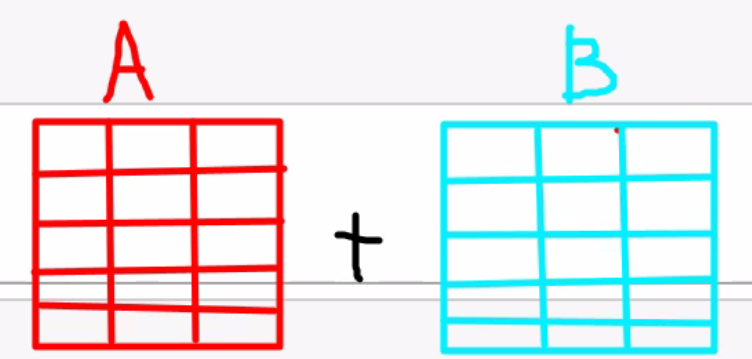

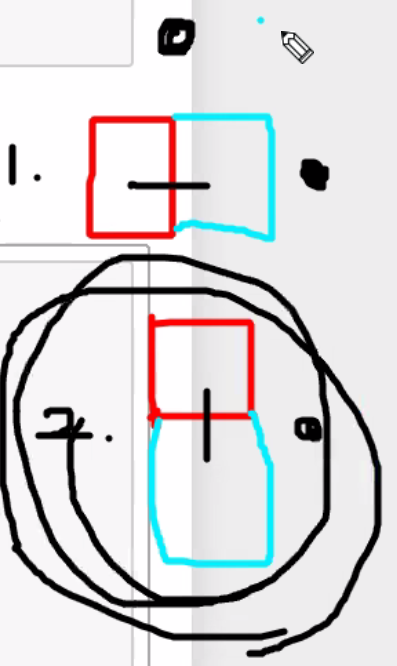

    서로 다른 DataFrame을 하나로 합치는 작업 
    1. Concat() - Concatenate
        - 단순히 하나의 DataFrame에 다른 DataFrame을 연속적으로 붙이는 방법
        위,아래로 합치는 것(기본 값)이지만 좌,우로도 연결 가능하다

        - outer join이 기본방식이다. (key가 중요)
        keys를 이용한 concat이 가능하다.

    2. Merge() (옆으로 붙임)
        - 컬럼과 인덱스가 같아야 한다.
        두개의 DataFrame에 공통적으로 포함되어져 있는 하나의 컬럼을 기준으로 삼아서 합치는 방식을 말한다.

        - inner join이 기본방식이다. (on이 중요)
        on 속성뒤에 공통의 컬럼명을 명시한다.
        how 속성뒤에 조인기업을 명시한다.  

3가지 DataFrame 만드는법
1. dic
2. ndarray
3. read
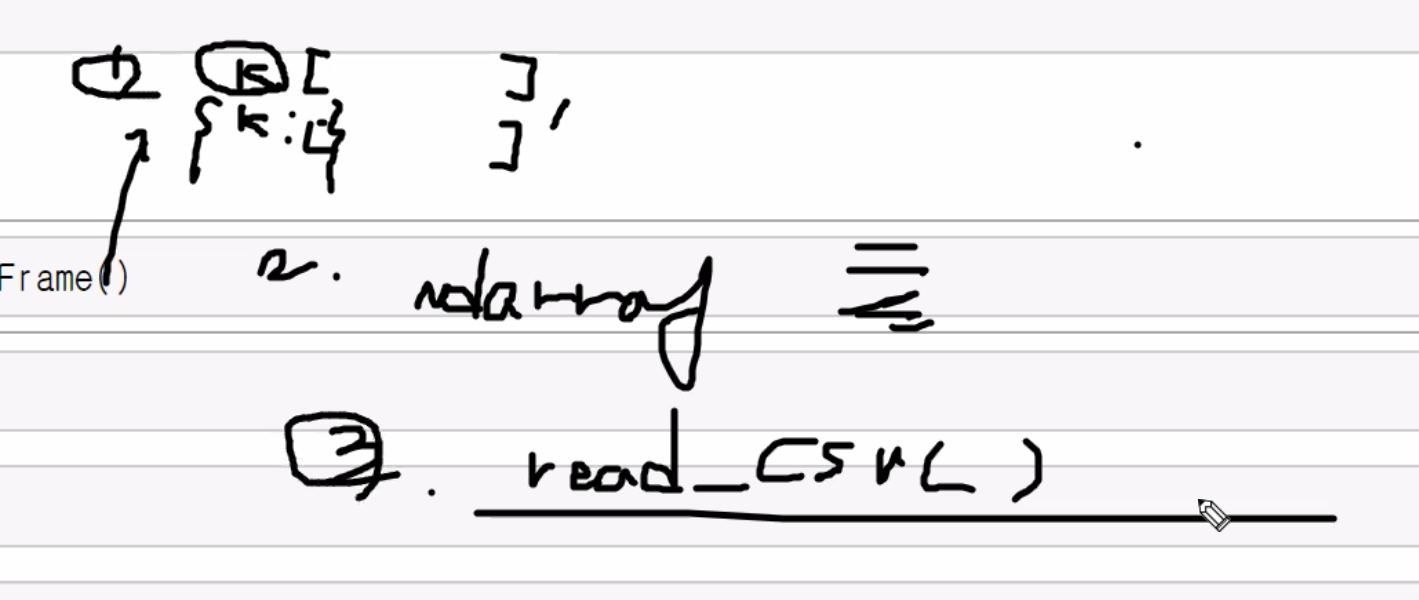

In [2]:
df1 = DataFrame({
    'A' : ['A0','A1','A2','A3'],
    'B' : ['B0','B1','B2','B3'],
    'C' : ['C0','C1','C2','C3'],
    'D' : ['D0','D1','D2','D3']
})
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [3]:
df2= DataFrame({
    'A' : ['A4','A5','A6','A7'],
    'B' : ['B4','B5','B6','B7'],
    'C' : ['C4','C5','C6','C7'],
    'D' : ['D4','D5','D6','D7']
})
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


    df1, df2의 데이터를 보면 서로다른 DataFrame이 상하로 연결되면 좋을거 같다.
    이유는 값이 연결되기도 하고, 컬럼값이 같기 때문이다.

    pd.concat(
        objs: Union[Iterable[~FrameOrSeries], Mapping[Union[Hashable, NoneType], ~FrameOrSeries]],
        axis=0,
        join='outer',
        ignore_index: bool = False,
        keys=None,
        levels=None,
        names=None,
        verify_integrity: bool = False,
        sort: bool = False,
        copy: bool = True,
    )

In [4]:
# 리스트 형태로 넣어야한다.
result = pd.concat([df1,df2], ignore_index=True) # ignore_index=True를 선언해서 인덱스의 값이 연결되게 해야한다. 
result 
# axis=1을 넣으면 좌우로 합쳐 진다. 좌우로 합칠때는 ignore_index=False로 선언.

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### 1-1 Concat - keys 
    grouping 한다고 생각하면 된다.
    
    용도는 다양하게 사용된다.
    1. 출처
    2. 세분화
    3. 그룹화 등등으로 사용된다.

In [5]:
result = pd.concat([df1, df2], keys=['Samsung','Naver']) # 반드시 리스트에 넣어야한다.
result

A   B   C   D
Samsung 0  A0  B0  C0  D0
        1  A1  B1  C1  D1
        2  A2  B2  C2  D2
        3  A3  B3  C3  D3
Naver   0  A4  B4  C4  D4
        1  A5  B5  C5  D5
        2  A6  B6  C6  D6
        3  A7  B7  C7  D7

In [6]:
df3 = DataFrame({
    'A' : ['A0','A1','A2','A3'],
    'B' : ['B0','B1','B2','B3'],
    'C' : ['C0','C1','C2','C3']
})
df3

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [7]:
df4 = DataFrame({
     'A' : ['A4','A5','A6','A7'],
    'B' : ['B4','B5','B6','B7'],
    'C' : ['C4','C5','C6','C7'],
    'D' : ['D4','D5','D6','D7']
})
df4

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [8]:
# df3에는 컬럼D가 없기 때문에 연산이 안된 값은 NaN으로 표기가 된다.
result2 = pd.concat([df3,df4], ignore_index=True)
result2

,A,B,C,D
0,A0,B0,C0,NaN
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,A3,B3,C3,NaN
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [9]:
result3 = pd.concat([df3,df4], ignore_index=True, join='inner') # join을 inner로 할 경우, 중복된 값만 가져온다.
result3

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7


### 2. Merge 
    pd.merge(
        left,
        right,
        how: str = 'inner',
        on=None,
        left_on=None,
        right_on=None,
        left_index: bool = False,
        right_index: bool = False,
        sort: bool = False,
        suffixes=('_x', '_y'),
        copy: bool = True,
        indicator: bool = False,
        validate=None,
    )

    df1 과 df2의 차이점은 index리스트의 요소가 다르다
    df3는 다른 컬럼명을 가지고 있다. 컬럼명 Color_numd을 갖고있음

In [10]:
df1 = DataFrame({ 'Year':[2001,2002,2003,2004],
                  'Product_Code':[11,22,33,44],
                  'Price':[10000,20000,30000,40000]},
                   index=list('1234'))
df1

,Year,Product_Code,Price
1,2001,11,10000
2,2002,22,20000
3,2003,33,30000
4,2004,44,40000


In [11]:
df2 = DataFrame({ 'Year':[2001,2002,2003,2004],
                  'Product_Code':[11,22,33,44],
                  'Price':[10000,20000,30000,40000]},
                   index=list('5678'))
df2

,Year,Product_Code,Price
5,2001,11,10000
6,2002,22,20000
7,2003,33,30000
8,2004,44,40000


In [12]:
df3 = DataFrame({ 'Year':[2001,2003,2004,2005],
                  'Product_Code':[11,22,33,44],
                  'Color_num':[33,44,55,99]},
                   index=list('1234'))
df3

,Year,Product_Code,Color_num
1,2001,11,33
2,2003,22,44
3,2004,33,55
4,2005,44,99


In [13]:
# concat과 merge의 차이점
# 1. 대괄호 안씀
# 2. 데이터 합쳐지는 방식이 join = outer , inner 차이가난다.
result = pd.concat([df1,df2])
result

,Year,Product_Code,Price
1,2001,11,10000
2,2002,22,20000
3,2003,33,30000
4,2004,44,40000
5,2001,11,10000
6,2002,22,20000
7,2003,33,30000
8,2004,44,40000


In [14]:
'''
1. 인덱스와 상관없이 병합
2. 값들은 중복 표기되지 않는다.
3. 병합시 표기법이 concat과 다르다 [](대괄호)를 사용하지 않는다.
'''
result = pd.merge(df1,df2)
result

,Year,Product_Code,Price
0,2001,11,10000
1,2002,22,20000
2,2003,33,30000
3,2004,44,40000


In [15]:
df1_1 = DataFrame({ 'Year':[2001,2002,2003,2004],
                  'Product_Code':[11,22,33,44],
                  'Price':[1,2,3,4]},
                   index=list('1234'))

# 데이터가 똑같지 않으면 데이터가 안나옴. overwrite를 못한다.
# merge는 on속성과 함께 사용된다.
# 하나의 컬럼을 기준으로 삼아서 합치는 방식. on='Year'
# merge 할때는 주로 특정한 컬럼을 기준으로 병합하고 이떄 on속성을 사용한다.
# ex) on='Year'

result = pd.merge(df1, df1_1, on='Year')
result 
# 값을보면 on(on='Year')의 기준값을 제외한 데이터 컬럼에 중복 표기가 된다.

,Year,Product_Code_x,Price_x,Product_Code_y,Price_y
0,2001,11,10000,11,1
1,2002,22,20000,22,2
2,2003,33,30000,33,3
3,2004,44,40000,44,4


In [16]:
# 2개의 컬럼을 기준으로 병합한다. Year, 
result2 = pd.merge(df1, df1_1, on=['Year','Product_Code'])
result2

,Year,Product_Code,Price_x,Price_y
0,2001,11,10000,1
1,2002,22,20000,2
2,2003,33,30000,3
3,2004,44,40000,4


### setIndex()를 사용해서 특정 컬럼값을 인덱스로 할당해줄수 있다.

In [17]:
result2.set_index('Year') # 이렇게 되면 연도별로 데이터를 만들수 있다. 좀 더 깔끔해진다. 
#주의사항 
# 1. inplace를 사용해서 원본에 접근하게 해줘야 한다.
# 2. set_index()함수 안에 값을 넣을때에는 on에서 기준이 된 값만 들어가야 한다.

,Product_Code,Price_x,Price_y
Year,,,
2001,11,10000,1
2002,22,20000,2
2003,33,30000,3
2004,44,40000,4


In [18]:
result2

,Year,Product_Code,Price_x,Price_y
0,2001,11,10000,1
1,2002,22,20000,2
2,2003,33,30000,3
3,2004,44,40000,4


In [19]:
result2.set_index('Year', inplace=True)

In [20]:
result2

,Product_Code,Price_x,Price_y
Year,,,
2001,11,10000,1
2002,22,20000,2
2003,33,30000,3
2004,44,40000,4


In [21]:
df3

,Year,Product_Code,Color_num
1,2001,11,33
2,2003,22,44
3,2004,33,55
4,2005,44,99


In [22]:
df1

,Year,Product_Code,Price
1,2001,11,10000
2,2002,22,20000
3,2003,33,30000
4,2004,44,40000


In [23]:
# on을 안쓰면 두 데이터프레임의 중복된 컬럼에 있는 값들이 모두 같은 행만 나온다
result3 = pd.merge(df1, df3)
result3

,Year,Product_Code,Price,Color_num
0,2001,11,10000,33


In [24]:
result3 = pd.merge(df1, df3, on='Product_Code').set_index('Product_Code')
result3

,Year_x,Price,Year_y,Color_num
Product_Code,,,,
11,2001,10000,2001,33
22,2002,20000,2003,44
33,2003,30000,2004,55
44,2004,40000,2005,99


In [25]:
result4 = pd.merge(df1, df3, how='inner', on='Year')
result4

,Year,Product_Code_x,Price,Product_Code_y,Color_num
0,2001,11,10000,11,33
1,2003,33,30000,22,44
2,2004,44,40000,33,55


In [26]:
result4 = pd.merge(df1, df3, how='outer', on='Year')
result4

,Year,Product_Code_x,Price,Product_Code_y,Color_num
0,2001,11.0,10000.0,11.0,33.0
1,2002,22.0,20000.0,NaN,NaN
2,2003,33.0,30000.0,22.0,44.0
3,2004,44.0,40000.0,33.0,55.0
4,2005,NaN,NaN,44.0,99.0


### merge - left, right
    how = 'inner' = on에 지정된 컬럼값이 공통적인 값들만 병합
    how = 'outer' = on에 지정된 컬럼값 전부 다 병함
    how = 'left' = on에 지정된 컬럼값중에서 왼편에 병합 데이터를 기준으로 병합한다.
    how = 'right' = on에 지정된 컬럼값중에서 오른편에 병합 데이터를 기준으로 병합한다.

In [27]:
result5 = pd.merge(df1, df3, how='inner', on='Year')
result5

,Year,Product_Code_x,Price,Product_Code_y,Color_num
0,2001,11,10000,11,33
1,2003,33,30000,22,44
2,2004,44,40000,33,55


In [28]:
result6 = pd.merge(df1, df3, how='left', on='Year') # on의 기준을 df1으로 잡는다 이유는 how='left'라고 써서
result6

,Year,Product_Code_x,Price,Product_Code_y,Color_num
0,2001,11,10000,11.0,33.0
1,2002,22,20000,NaN,NaN
2,2003,33,30000,22.0,44.0
3,2004,44,40000,33.0,55.0


In [29]:
result7 = pd.merge(df1, df3, how='right', on='Year') # on의 기준을 df3 로 잡는다 이유는 how='right'라고 써서
result7

,Year,Product_Code_x,Price,Product_Code_y,Color_num
0,2001,11.0,10000.0,11,33
1,2003,33.0,30000.0,22,44
2,2004,44.0,40000.0,33,55
3,2005,NaN,NaN,44,99
